# Importing relevant libraries and functions for Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

## Import the train and test datasets

In [2]:
featuretrain_X = pd.read_csv('features_train.csv')
featuretest_X = pd.read_csv('features_test.csv')
targettrain_y = pd.read_csv('target_train.csv')
targettest_y = pd.read_csv('target_test.csv')

In [3]:
featuretrain_X.head(5)

,notimpt,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,1,1,1,2,0,4,2,1,2,...,1,0,1,0,0,1,0,1,1,0
1,1,3,3,1,2,0,4,3,1,2,...,1,0,0,1,0,1,0,1,0,1
2,1,4,2,1,3,0,5,3,1,3,...,1,0,0,1,0,1,0,1,1,0
3,1,3,3,3,2,0,5,3,1,3,...,0,1,1,0,0,1,0,1,1,0
4,1,1,1,1,3,0,4,4,1,1,...,1,0,0,1,0,1,1,0,0,1


In [4]:
featuretest_X.head(5)

,notimpt,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,...,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,3,1,1,1,3,5,5,5,5,...,1,0,1,0,1,0,0,1,0,1
1,1,3,3,2,2,0,4,2,1,3,...,1,0,1,0,0,1,0,1,0,1
2,1,2,2,1,1,0,4,5,2,4,...,1,0,0,1,0,1,0,1,0,1
3,1,3,3,2,4,1,5,5,3,4,...,1,0,0,1,0,1,1,0,1,0
4,1,2,1,1,2,0,4,5,1,1,...,1,0,1,0,0,1,1,0,0,1


In [5]:
targettrain_y.head(5)

,grade
0,Average
1,Average
2,High
3,Average
4,Average


In [6]:
targettest_y.head(5)

,grade
0,Average
1,Average
2,Average
3,Average
4,Average


## Random Forest

In [7]:
# Random Forest Model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(featuretrain_X, targettrain_y)

# Predictions
rf_predictions = random_forest_model.predict(featuretest_X)

# Evaluation
rf_accuracy = accuracy_score(targettest_y, rf_predictions)
rf_report = classification_report(targettest_y, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)

C:\Users\limwe\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.7894736842105263
Classification Report:
               precision    recall  f1-score   support

     Average       0.86      0.88      0.87       165
        High       0.68      0.58      0.62        33
         Low       0.00      0.00      0.00        11

    accuracy                           0.79       209
   macro avg       0.51      0.49      0.50       209
weighted avg       0.79      0.79      0.79       209



**For the ‘Average’ class, the model has a precision of 0.85, recall of 0.90, and F1-score of 0.87. This means that the model is performing well on the ‘Average’ class. The model is also performing relatively well for the 'High' class, however it is very bad in predicting the 'Low' class.**

**The Random Forest does well with an overall F1-score accuracy of 0.78.**

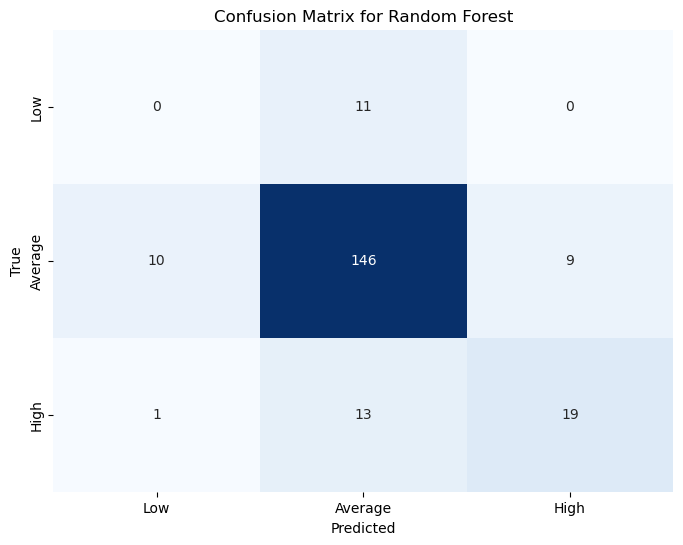

In [8]:
# Define Class labels
class_labels = ['Low', 'Average', 'High']

# Generate confusion matrix
cm = confusion_matrix(targettest_y, rf_predictions, labels=class_labels)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

**As expected, the model was able to do well in predicting the 'Average' and 'High' class results, but not so for the 'Low' classes.**

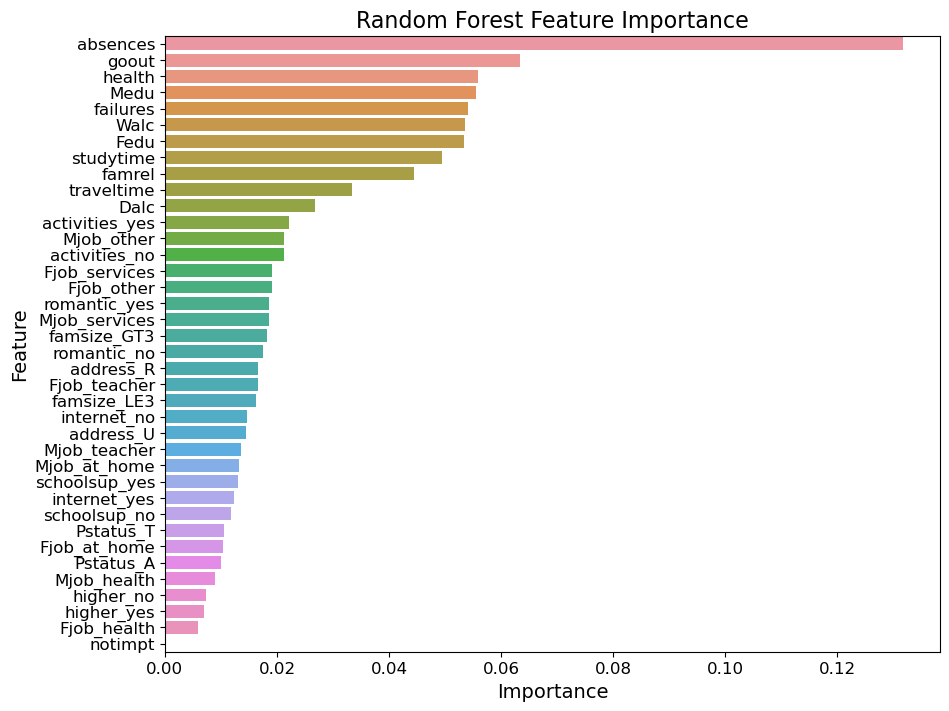

In [9]:
# Feature Importance
plt.figure(figsize=(10, 8))  # Set the figure size
feature_importances = pd.DataFrame({'Feature': featuretrain_X.columns, 'Importance': random_forest_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importance', fontsize=16)  # Adjust the title font size
plt.xlabel('Importance', fontsize=14)  # Adjust the x-axis label font size
plt.ylabel('Feature', fontsize=14)  # Adjust the y-axis label font size
plt.xticks(fontsize=12)  # Adjust the x-axis tick font size
plt.yticks(fontsize=12)  # Adjust the y-axis tick font size
plt.show()

In [10]:
# Feature importance
rf_importances = pd.DataFrame({'Feature': featuretrain_X.columns, 'Importance': random_forest_model.feature_importances_})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False)
print(rf_importances.head(10))

       Feature  Importance
11    absences    0.131756
7        goout    0.063351
10      health    0.055894
1         Medu    0.055523
5     failures    0.054160
9         Walc    0.053526
2         Fedu    0.053457
4    studytime    0.049376
6       famrel    0.044389
3   traveltime    0.033376


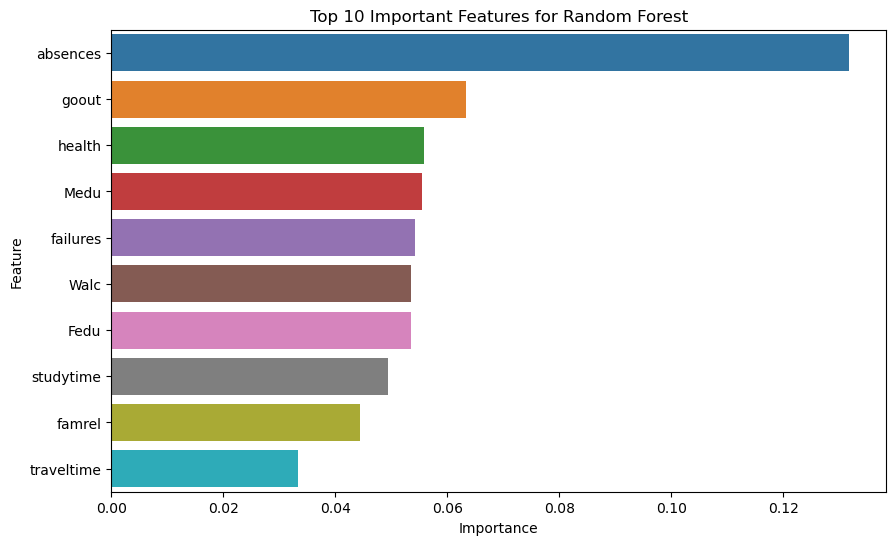

In [11]:
rf_importances = pd.DataFrame({'Feature': featuretrain_X.columns, 'Importance': random_forest_model.feature_importances_})
rf_importances.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances.head(10))
plt.title('Top 10 Important Features for Random Forest')
plt.show()

**As seen from the above bar graph, we can see that if a student is often absent, it will affect their grades a lot. Some factors, although not as significant as absences, still do affect their grade as well.**

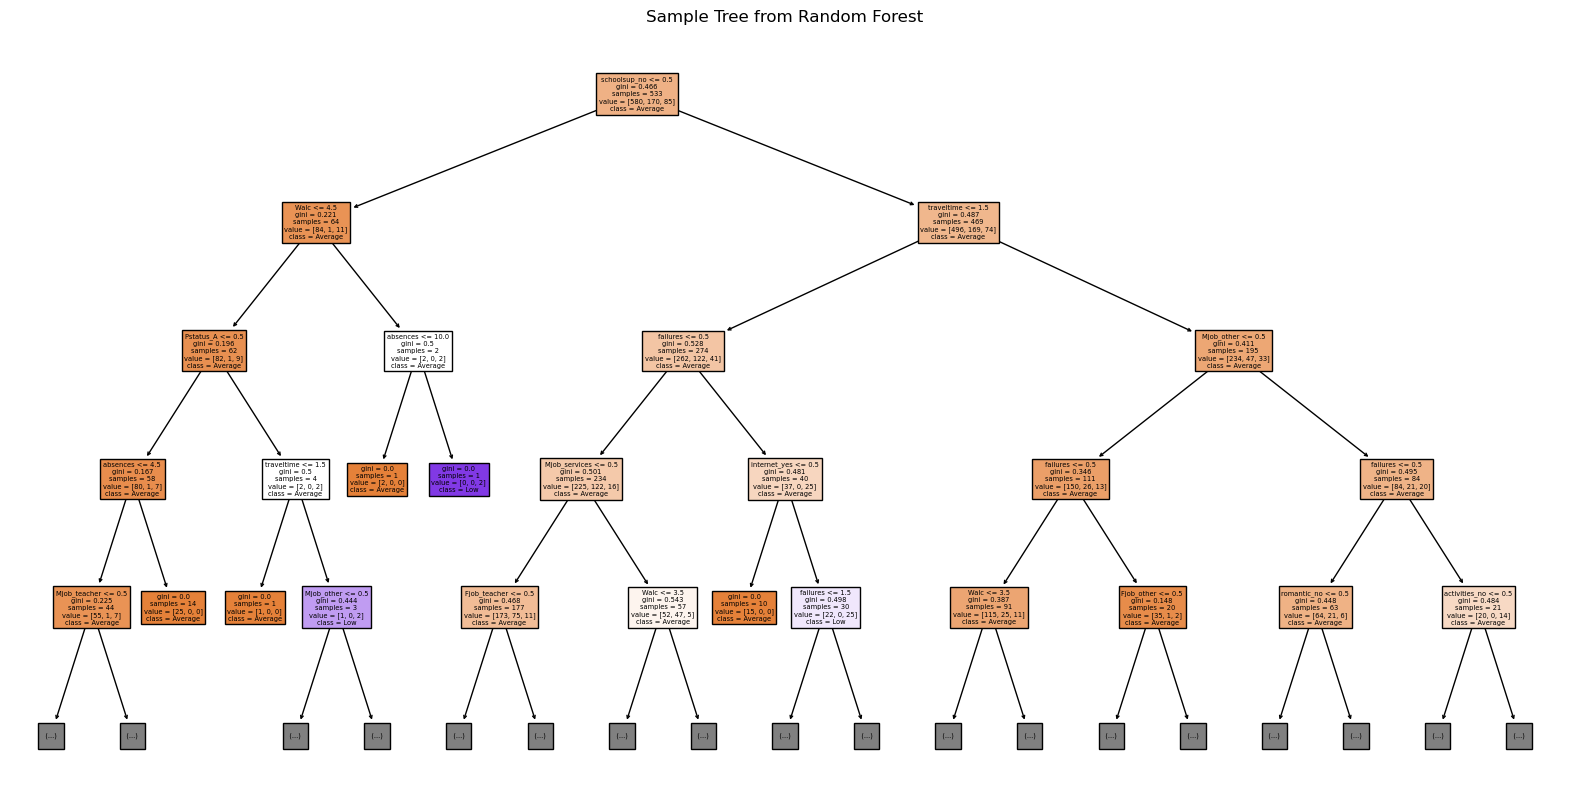

In [16]:
# Load the target data
targettrain_y = pd.read_csv('target_train.csv')

# If targettrain_y is a DataFrame with one column, convert it to a Series
if isinstance(targettrain_y, pd.DataFrame) and targettrain_y.shape[1] == 1:
    targettrain_y = targettrain_y.squeeze()  # Converts DataFrame with a single column to Series

# Now, assuming targettrain_y is a Series, get unique classes
unique_classes = np.sort(targettrain_y.unique())

# Access the first tree from the random forest for visualization
estimator = random_forest_model.estimators_[0]

# Plotting the tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, feature_names=featuretrain_X.columns.tolist(), class_names=unique_classes.tolist(), max_depth=4)

plt.title('Sample Tree from Random Forest')
plt.show()